In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

connected nodes: 298


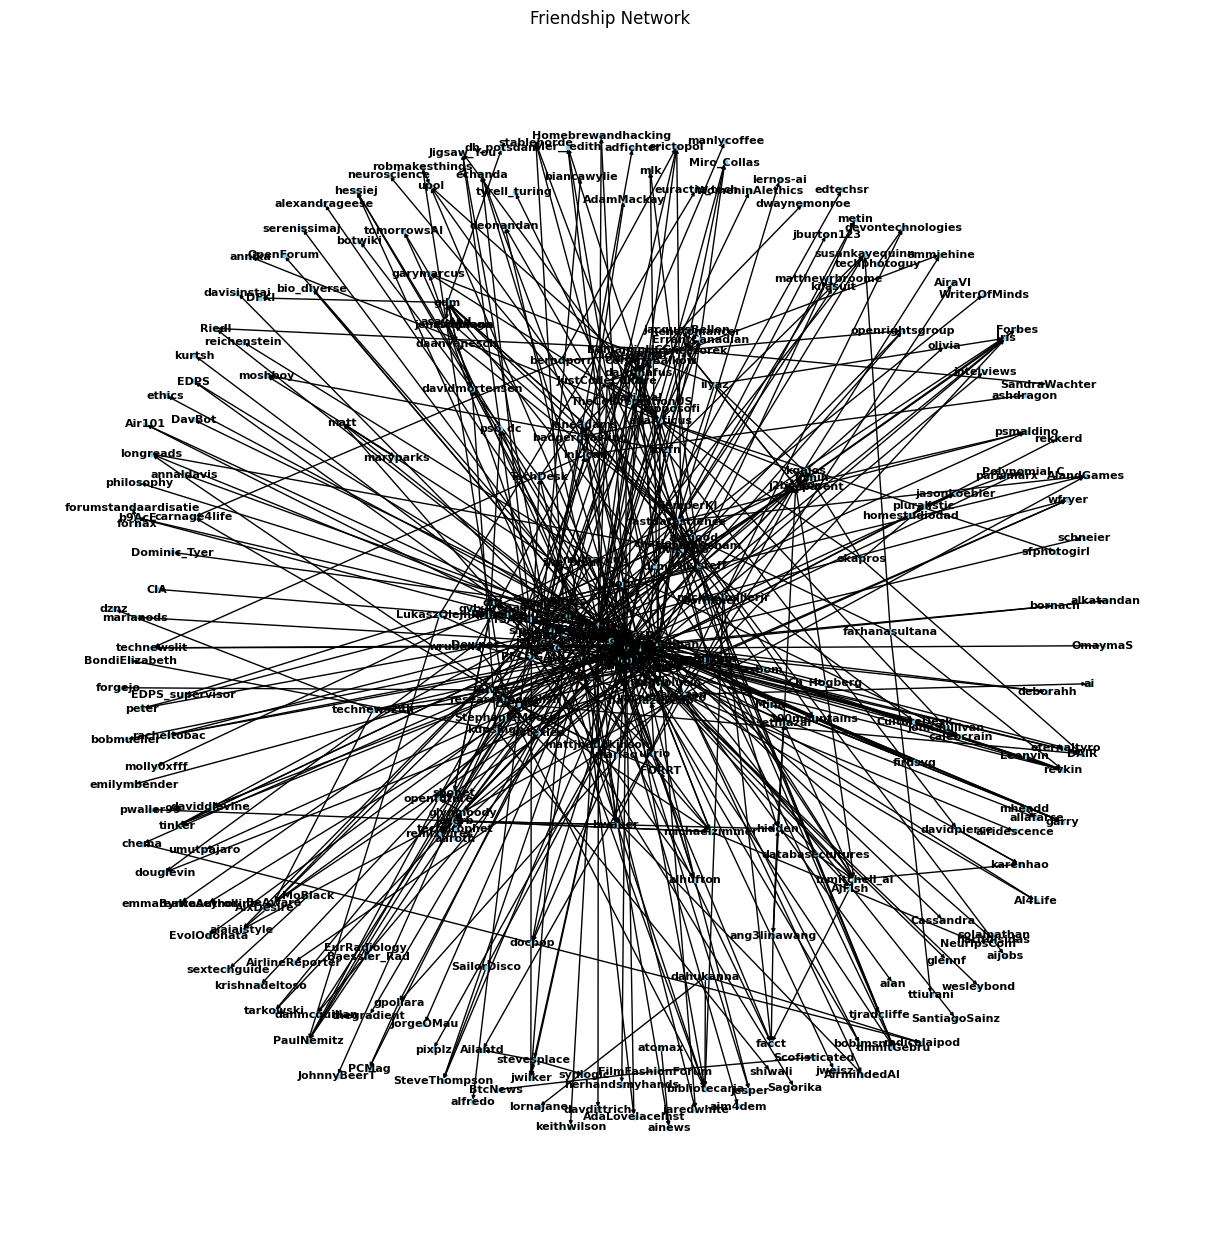

In [2]:

# Open the JSON file in read mode
json_file_path = "/home/saurabh/AAA/Focusing/Projects/social-media-data-analysis/data/final_data.json"
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)

relational_data = []
for user in data:
    if len(user['followers']) or len(user['followings']):
        relational_data.append(user)

print(f"connected nodes: {len(relational_data)}")

# Initialize a directed graph for the Friendship Network
G = nx.DiGraph()
data = list(relational_data)
# Add nodes (users) to the graph
for user in data:
    username = user['username']
    G.add_node(username)

# Add directed edges based on follower and followee relationships
for user in data:
    username = user['username']
    followings = user['followings']  # Assuming 'followings' contains user IDs being followed
    for following_user_id in followings:
        following_user = next((x for x in data if x['id'] == following_user_id), None)
        if following_user:
            following_username = following_user['username']
            G.add_edge(username, following_username)

# Visualize the Friendship Network (optional)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=10, node_color='skyblue', with_labels=True, font_size=8, font_color='black', font_weight='bold', arrowsize=5)
plt.title("Friendship Network")
plt.show()

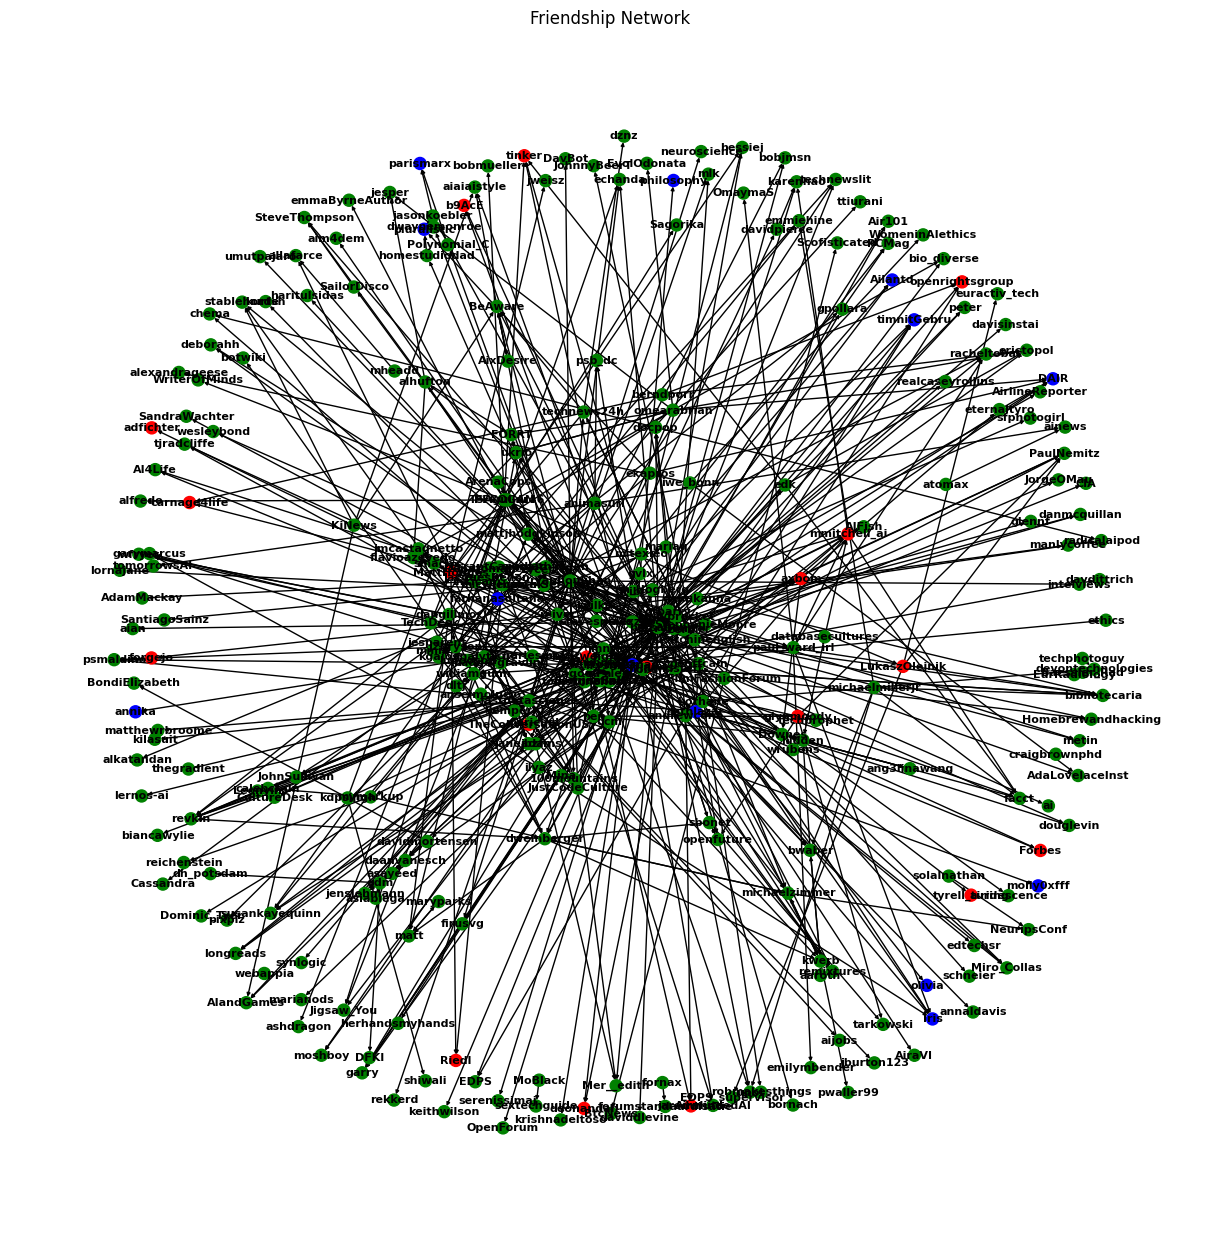

In [14]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Open the JSON file in read mode
json_file_path = "/home/saurabh/AAA/Focusing/Projects/social-media-data-analysis/data/classified_data.json"
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)

# Initialize a directed graph for the Friendship Network
G = nx.DiGraph()

# Add nodes (users) to the graph with assigned colors based on ai_sentiment
color_map = {}
sentiment_colors = {
    (1, 0, 0): 'red',     # AI optimist
    (0, 1, 0): 'green',   # Neutral
    (0, 0, 1): 'blue'     # AI pessimist
}

for user in data:
    username = user['username']
    ai_sentiment = user['ai_sentiment']
    color = sentiment_colors[tuple(ai_sentiment) if sum(ai_sentiment)==1 else (0,1,0)]
    color_map[username] = color  # Assign color based on sentiment
    G.add_node(username)

# Add directed edges based on follower and followee relationships
for user in data:
    username = user['username']
    followings = user['followings']  # Assuming 'followings' contains user IDs being followed
    for following_user_id in followings:
        following_user = next((x for x in data if x['id'] == following_user_id), None)
        if following_user:
            following_username = following_user['username']
            G.add_edge(username, following_username)

# Visualize the Friendship Network (optional)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=75, node_color=[color_map[node] for node in G.nodes()], with_labels=True, font_size=8, font_color='black', font_weight='bold', arrowsize=5)
plt.title("Friendship Network")
plt.show()


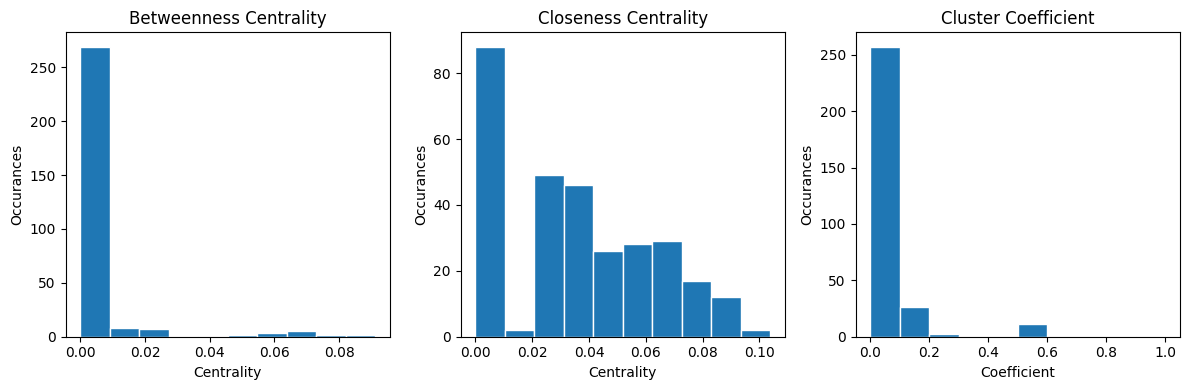

In [19]:
betweenness = nx.betweenness_centrality(G, endpoints=False)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(list(betweenness.values()), edgecolor='white')
plt.title('Betweenness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Occurances')

closeness = nx.closeness_centrality(G)
plt.subplot(132)
plt.hist(list(closeness.values()), edgecolor='white')
plt.title('Closeness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Occurances')

cluster_coef = nx.clustering(G)
plt.subplot(133)
plt.hist(list(cluster_coef.values()), edgecolor='white')
plt.title('Cluster Coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Occurances')

plt.tight_layout()
plt.show()

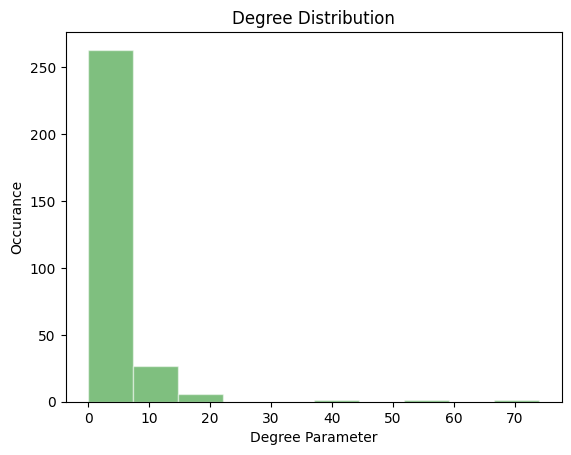

In [23]:
degree = list(dict(G.degree()).values())

plt.hist(degree, alpha=0.5, color='g', edgecolor='white')
plt.xlabel('Degree Parameter')
plt.ylabel('Occurance')
plt.title('Degree Distribution')
plt.show()